### Imports libraries

In [238]:
from IPython.display import display, Markdown
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Loading data

In [239]:
def loading_data():
    return pd.read_csv('../../data/processed/exercise.csv')

dictionary = pd.read_csv('../../data/external/dictionary.csv')

df = loading_data()
df

,id,diet,pulse,time,kind
0,1,low fat,85,1,rest
1,1,low fat,85,15,rest
2,1,low fat,88,30,rest
3,2,low fat,90,1,rest
4,2,low fat,92,15,rest
...,...,...,...,...,...
85,29,no fat,135,15,running
86,29,no fat,130,30,running
87,30,no fat,99,1,running
88,30,no fat,111,15,running


### Processing of missing data

In [240]:
pd.concat([df.isnull().sum(), display(df[['pulse', 'time']].describe())], axis=1).T

,pulse,time
count,90.000000,90.000000
mean,99.700000,15.333333
std,14.858471,11.907886
min,80.000000,1.000000
25%,90.250000,1.000000
50%,96.000000,15.000000
75%,103.000000,30.000000
max,150.000000,30.000000


,id,diet,pulse,time,kind
0,0,0,0,0,0


In [241]:
mean = df[['pulse', 'time']].mean()
std = df[['pulse', 'time']].std()

In [242]:
def impute_missing_data():
    df = loading_data()
    if df.isnull().sum().sum() == 0:
        display('No missing values, entering...')
        missing_rate = .4
        columns = ['pulse', 'time']
        for column in columns:
            missing_rows = np.random.choice(
                range(df.shape[0]),
                size=int(df.shape[0] * missing_rate),
                replace=False
            )
            df.loc[missing_rows, column] = np.NaN
    return df.isnull().sum(), df

_, df = impute_missing_data()
df = df

'No missing values, entering...'

In [243]:
print('removing lines: ', df.dropna().shape)
print('removing columns: ', df.dropna(axis=1).shape)

removing lines:  (37, 5)
removing columns:  (90, 3)


In [244]:
df[['pulse', 'time']]

,pulse,time
0,85.0,1.0
1,NaN,15.0
2,88.0,30.0
3,NaN,1.0
4,NaN,15.0
...,...,...
85,NaN,15.0
86,NaN,30.0
87,NaN,NaN
88,NaN,NaN


In [245]:
qualitative_variables = (
    dictionary
    .query("tipo == 'qualitativa'")
    .variavel
    .to_list()
)
quantitative_variables = (
    dictionary
    .query("tipo == 'quantitativa'")
    .variavel
    .to_list()
)
quantitative_variables.remove('id')
qualitative_variables + ['-'] + quantitative_variables

['diet', 'kind', '-', 'pulse', 'time']

In [246]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer(strategy='most_frequent')
simple_imputer.fit(df[quantitative_variables])
df2 = simple_imputer.transform(df[quantitative_variables])

print(mean[0],mean[1], std[0],std[1])
print(df2.mean(axis=0), df2.std(axis=0))

99.7 15.333333333333334 14.858470893849434 11.907886160397602
[97.18888889 15.98888889] [11.06635988  8.77559044]


In [247]:
from sklearn.impute import KNNImputer
_, df = impute_missing_data()
df = df

knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(df[quantitative_variables])
df3 = knn_imputer.transform(df[quantitative_variables])

print(mean[0],mean[1], std[0],std[1])
print(df3.mean(axis=0), df3.std(axis=0))

'No missing values, entering...'

99.7 15.333333333333334 14.858470893849434 11.907886160397602
[99.66395062 16.90765432] [11.6074197  10.05582065]


In [248]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
_, df = impute_missing_data()
df = df

iterative_imputer = IterativeImputer(estimator=LinearRegression()) 
iterative_imputer.fit(df[quantitative_variables])
df4 = iterative_imputer.transform(df[quantitative_variables])

print(mean[0],mean[1], std[0],std[1])
print(df4.mean(axis=0), df4.std(axis=0))

'No missing values, entering...'

99.7 15.333333333333334 14.858470893849434 11.907886160397602
[99.5177449  15.46463726] [11.90924661  9.1808329 ]


### Handling discrepant data

<Axes: >

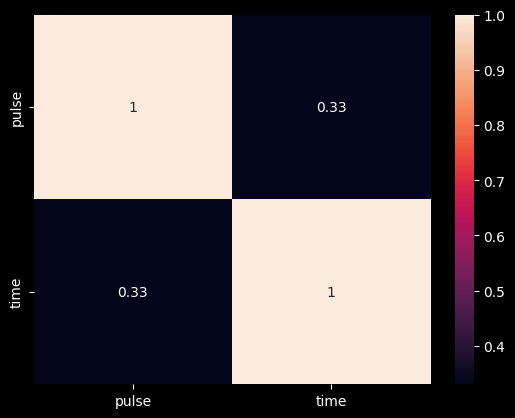

In [249]:
sns.heatmap(df[['pulse', 'time']].corr(),annot=True)

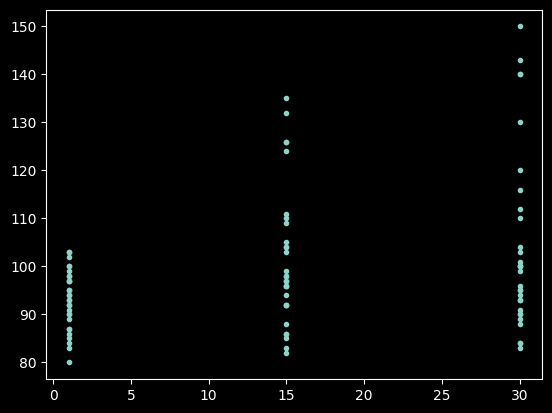

In [250]:
df = loading_data()

x = df['time'].values
y = df['pulse'].values
# y[-1] = y[-1] * 2

plt.plot(x, y, '.')

In [251]:
y_mean = y.mean()
y_std = y.std()
z_score = np.abs(y - y_mean) / y_std
z_score

array([0.99487718, 0.99487718, 0.79184102, 0.65648358, 0.52112614,
       0.45344742, 0.18273254, 0.18273254, 0.3857687 , 1.33327078,
       1.19791334, 1.13023462, 0.58880486, 0.52112614, 0.58880486,
       1.13023462, 1.13023462, 1.0625559 , 0.85951974, 0.79184102,
       0.65648358, 0.52112614, 0.3857687 , 0.31808998, 0.18273254,
       0.0473751 , 0.25041126, 0.02030362, 0.18273254, 0.02030362,
       0.92719846, 0.92719846, 1.0625559 , 0.45344742, 0.22333977,
       0.29101849, 0.65648358, 0.52112614, 0.45344742, 0.31808998,
       0.25041126, 0.02030362, 0.7241623 , 0.25041126, 0.31808998,
       1.0625559 , 0.92719846, 0.7241623 , 0.22333977, 0.62941209,
       0.65648358, 0.52112614, 0.25041126, 0.08798234, 0.18273254,
       0.11505382, 0.02030362, 0.15566105, 0.29101849, 0.22333977,
       0.45344742, 0.11505382, 0.69709081, 0.11505382, 0.29101849,
       0.83244825, 0.11505382, 0.35869721, 0.0473751 , 0.85951974,
       2.18602264, 1.37387801, 0.3857687 , 0.69709081, 1.10316

In [252]:
x_without_anomalies = x[z_score <= 3]
y_witout_anomalies = y[z_score <= 3]

x_without_anomalies.shape, y_witout_anomalies.shape

((89,), (89,))

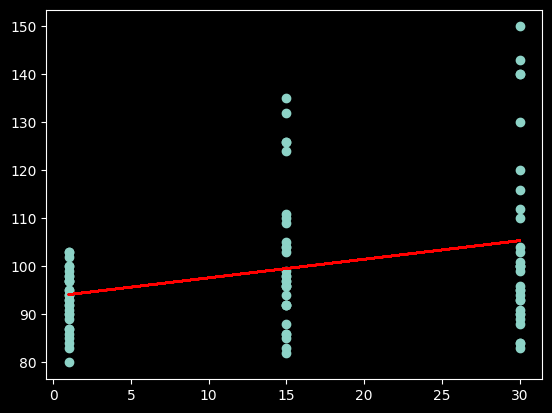

In [253]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

y_hat = model.predict(x.reshape(-1, 1))

plt.scatter(x, y)
plt.plot(x, y_hat, color='red')
plt.show()